In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
#rozwiazanie równania z jednym rozwiązaniem
"""
2*x + 5*y + 3*z = 12
8*x - 3*y + 5*z = -9
5*x - 2*y + 3*z = 15
x = [x, y, z]
y = [12, -9, 15]
Ax = y
"""

A = np.array([ #zdefiniowanie macierzy A
    [2, 5, 3],
    [8, -3, 5],
    [5, -2, 3],], dtype=np.float32)

y = np.array([ #zdefiniowanie macierzy y
    12, -9, 15], dtype=np.float32)

#Ax = y równanie układu równań
print("Rank A: ", np.linalg.matrix_rank(A)) #przedstawienie rzędu macierzy A
x = np.linalg.inv(A) @ y #obliczenie x gotową funkcją (odwrócenie macierzy A i przemnożenie przez y)
#x = np.linalg.pinv(A) @ y #
print(x) 
print(A @ x)

#rzad macierzy jest równy 3,liczba liniowo niezaleznych kolumn jest rowna 3, wiec układ ma jedno rozwiązanie
#w ten sposób nie rozwiazujemy układów, chyba że są bardzo proste
#problemy - odwracanie mozliwe tylko dla macierzy kwadratowej, z jednym rowiazaniem
#w pzrypadku duzych macierzy odwracanie jest czasochłonne

Rank A:  3
[ 177.75   75.75 -240.75]
[12. -9. 15.]


In [4]:
#rozwiazanie równania z nieoznaczonego
"""
2*x + 5*y + 3*z = 12
8*x - 3*y + 5*z = -9
4*x + 10*y + 6*z = 24
"""

A = np.array([ #zdefiniowanie macierzy A
    [2, 5, 3],
    [8, -3, 5],
    [4, 10, 6],], dtype=np.float32)

y = np.array([ #zdefiniowanie wektora y
    12, -9, 24], dtype=np.float32)

print("Rank A: ", np.linalg.matrix_rank(A)) #obliczenie rzędu macierzy A
print("Det A: ", np.linalg.det(A)) #obliczenie wyznacznika macierzy A

#tym sposobem wyrzuci nam bład obliczeń, bo wyznacznik równy 0, czyli macierz nieodwracalna
# x = np.linalg.inv(A) @ y #obliczanie układu równań
# print(x)
# print(A @ x)


x = np.linalg.pinv(A) @ y #obliczanie układu równań przez pseudoinwersje
#x = np.linalg.inv(A.T @ A) @ A.T @ y
print("rozwiazanie układu:", x)
print("sprawdzenie rozwiazań:", A @ x)

#odwracanie nie dziala bo rzad macierzy jest rowny 2, czyli macierz nie ma jednego rozwiązania (nieskończenie wiele)
#obliczylismy przykładowe rozwiazanie metodą pseudoinwersji
#nie jest to idealne podejscie, unikamy jej

Rank A:  2
Det A:  0.0
rozwiazanie układu: [-0.4705882   2.3650517   0.37197232]
sprawdzenie rozwiazań: [11.999999 -9.       23.999998]


In [11]:
#rozwiazanie równania sprzecznego
"""
2*x + 5*y + 3*z = 12
8*x - 3*y + 5*z = -9
2*x + 5*y + 3*z = 11 
"""

A = np.array([ #zdefiniowanie macierzy A
    [2, 5, 3],
    [8, -3, 5],
    [2, 5, 3],], dtype=np.float32)

y = np.array( #zdefiniowanie wektora y
    [12, -9, 11], dtype=np.float32)

print("Rank A: ", np.linalg.matrix_rank(A)) #obliczenie rzedu macierzy A
x = np.linalg.pinv(A) @ y #obliczenie układu równań
print("rozwiazanie:", x)
print("sprawdzenie:", A @ x)

#macierz A ma dwa sprzeczne równania, jeżeli rząd macierzy jest mniejszy od liczby rownan to uklad jest sprzeczny 
#lub nieoznaczony
#rozwiazanie nie spelnia układu równan, ale spelnia go najbardziej jak sie da
#rozwiazanie minimalizuje blad srednio-kwadratowy wzgledem wektora y

Rank A:  2
rozwiazanie: [-0.4803922   2.2874856   0.34111884]
sprawdzenie: [11.5 -9.  11.5]


Rank A:  2
rozwiazanie: [1.8499999 1.6499991]
sprawdzenie: [10.9       9.049999  7.199999  5.349999]
rozwiazanie: [1.8500006 1.6500025]
sprawdzenie: [10.900005   9.050005   7.2000046  5.3500037]


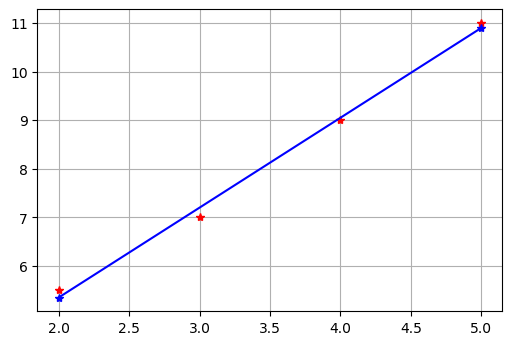

In [17]:
#rozwiazanie macierzy niekwadratowej z jednym rozwiazaniem
"""
5 * a + 1 * b = 11
4 * a + 1 * b = 9
3 * a + 1 * b = 7
2 * a + 1 * b = 5.5
"""

A = np.array([ #zdefiniowanie macierzy A (niekwadratowa)
    [5, 1],
    [4, 1],
    [3, 1],
    [2, 1],], dtype=np.float32)

y = np.array([ #zdefiniowanie wektora y
    11, 9, 7, 5.5], dtype=np.float32)

print("Rank A: ", np.linalg.matrix_rank(A)) #oblicznie rzędu macierzy A

x = np.linalg.pinv(A) @ y #obliczenie układu przez pseudoinwersje
print("rozwiazanie:", x)
print("sprawdzenie:", A @ x)

x = np.linalg.inv(A.T @ A) @ A.T @ y #równanie do metody najmniejszych kwadratów
print("rozwiazanie:", x)
print("sprawdzenie:", A @ x)

plt.figure(dpi=100) #przedstawienie wykresów
plt.plot([2, 3, 4, 5], [5.5, 7, 9, 11], "r*") #wykres x i y z układu równan (nie można poprowadzic lini)
plt.plot([2, 5], [x[0]*2 + x[1], x[0]*5 + x[1]], "b*-") #wykres prostej którą obliczylismy z metody najmniejszych kwadratow
plt.grid(True)

#uklad nie ma dobrego rozwiazania, poniewaz nie mozemy poprowadzic prostej przez te punkty
#zaimplementowaliśmy meotde najmniejszych kwadratow na macierzach
#obie metody delikatnie się różnia bo maja inne sposoby liczenia (pseudoinwersja - svd)
#otrzymujemy rozwiazanie zblizone do rozwiazania z równania
#to w praktyce bardzo czesto wykorzystujemy, układy z 1 rozwiazaniem prawie nie istnieja wiec to sie spelnia

In [3]:
# ZADANIE 1
#Napisz funkcję implementującą algorytm eliminacji Gaussa dla dowolnej macierzy kwadratowej, którą można 
#sprowadzić do postaci górnej trójkątnej. Przetestuj funkcję dla różnych macierzy (w tym dla macierzy o dużym rozmiarze). 
#Pamiętaj o poprawnej implementacji pivotów.

def gaussian_elimination(A): #zdefiniowanie funkcji do metody elminacji gaussa
    
    B = np.zeros(A.shape) #macierz do edycji kolejnych równań w macierzy A
    z = np.zeros(A.shape) #macierz do zamiany wierszy w przypadku zlego pivotu
    
    for k in range(len(A)): #petla do liczenia kolejnych nowych równań
    
        pivot = A[k,k] #wartosc pivotu
        
        if pivot == 0: #gdy pivot jest równy 0
            print("Błąd pivotu!! :", k+1)
            
            if A[k+1,k] != 0: #gdy pierwszy element kolejnego wiersza nie jest zerowy
                z[k] = A[k] #zamiana wierszy przez zmienna tymczasową (1 z 2)
                A[k] = A[k+1]
                A[k+1] = z[k] 
                pivot = A[k,k] #nowy pivot
                
            else: #gdy pierwszy element kolejengo wiesza jest równy zero
                z[k] = A[k] #zamiana wierszy przez zmienna tymczasową (1 z 3)
                A[k] = A[k+2]
                A[k+2] = z[k]
                pivot = A[k,k] #nowy pivot
            
        if pivot != 0: #gdy pivot nie jest rowny zero
            #print(k+1,"pivot dobry :)")
            
            for j in range(k+1,len(A)): #petla do liczenia a21/a11
                a = A[j,k]/pivot #algorytm liczenia a21/a11
        
                for i in range(k,len(A)): #petla do obliczenia nowych równań
                    B[j,i] = A[k,i]*a
                    A[j,i] = A[j,i] - B[j,i] #obliczenie nowego równania
        
    return A #zwrócenie macierzy górnej trójkątnej

            
def gaussian_elimination_2(A, y): #zdefiniowanie funkcji do metody elminacji gaussa dla macierzy A i wektora y
    
    B = np.zeros(A.shape) #macierz do kolejnych równań w macierzy A przemnozonych przez a21/a11
    C = np.zeros(y.shape) #macierz do kolejnych równań w wektorze y przemnozonych przez a21/a11
    
    z = np.zeros(A.shape) #macierz do zamiany wierszy w przypadku zlego pivotu
    
    for k in range(len(A)): #petla do liczenia pkolejnych nowych równań
    
        pivot = A[k,k] #wartosc pivotu
        
        if pivot == 0: #gdy pivot równy zero
            print("Błąd pivotu!! :", k+1)
            
            if A[k+1,k] != 0: #gdy pierwszy element kolejnego wiersza nie jest zerowy
                z[k] = A[k] #zamiana wierszy przez zmienna tymczasową (1 z 2)
                A[k] = A[k+1]
                A[k+1] = z[k] 
                pivot = A[k,k] #nowy pivot
                
            else: #gdy pierwszy element kolejengo wiesza jest równy zero
                z[k] = A[k] #zamiana wierszy przez zmienna tymczasową (1 z 3)
                A[k] = A[k+2]
                A[k+2] = z[k]
                pivot = A[k,k] #nowy pivot
                
        if pivot != 0: #gdy pivot nie jest rowny zero
            #rint(k+1,"pivot dobry :)")
            
            for j in range(k+1,len(A)): #petla do liczenia a21/a11
                a = A[j,k]/pivot #algorytm liczenia a21/a11
                #print("dla wiersza", k+1,"a21/a11:", a)
                C[j] = y[k]*a #obliczenie nowej waerotsci wektora y
                y[j] = y[j] - C[j] 
        
                for i in range(k,len(A)): # petla do obliczenia nowych równań
                    B[j,i] = A[k,i]*a
                    A[j,i] = A[j,i] - B[j,i] #obliczenie nowego równania
        
    return A, y #zwrócenie macierzy A górnej trójkątnej i zmienionych wartosci wektora y
                
X = np.array([
    [1, 8, 6, 4, 6],
    [2, 3, 8, 5, 7],
    [1, 3, 3, 3, 8],
    [4, 6, 8, 1, 9],
    [5, 7, 1, 3, 5],],dtype=np.float32)

Y = np.array([
    [3, 3, 5, 5],
    [2, 5, 6, 4],
    [1, 7, 5, 3],
    [4, 6, 8, 1],],dtype=np.float32)

O = np.array([
    [2, 4, 5],
    [3, 2, 3],
    [5, 3, 2],], dtype=np.float32)

x = np.array([10, 7, 4])


print("func: \n", gaussian_elimination(Y), "\n")
#print("func: \n", gaussian_elimination_2(O,x), "\n")

#print("func: \n", gaussian_elimination(Y), "\n")


func: 
 [[ 3.0000000e+00  3.0000000e+00  5.0000000e+00  5.0000000e+00]
 [ 0.0000000e+00  3.0000000e+00  2.6666665e+00  6.6666651e-01]
 [ 0.0000000e+00  0.0000000e+00 -1.9999998e+00  2.3841858e-07]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -6.1111112e+00]] 



Model:  [ 9.80407380e-01 -4.93464007e-04  4.45857433e-02]


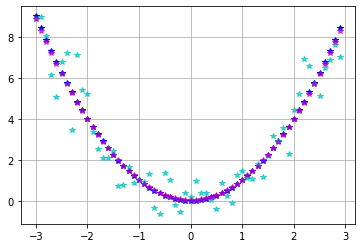

In [81]:
#Aproksymacja
start, stop = -3, 3
step = 0.1
x = np.arange(start, stop, step) #wygenerowanie zakresu zmiennej x
polynomial = np.array([1, 0, 0], dtype=np.float32) #wielomian stopnia 2, gdzie a=1, b=0, c=0
# y = x^2

X = np.array([ #obliczenie wielomianu dla zmiennej x (macierz transponowana)
    x**2, x**1, x**0]).T

values = X @ polynomial #wartości naszego układu równań
values_with_noise = values + np.random.normal(0, 1, size=values.shape) #wartość z szumem normalnym

fitted_polynomial = np.linalg.inv(X.T @ X) @ X.T @ values_with_noise #meotda pseudoinwersji dla wartość z szumem
#fitted_polynomial = np.linalg.pinv(X) @ values_with_noise
print("Model: ", fitted_polynomial) #obliczony model
# print(X)
fitted_values = X @ fitted_polynomial #dopasowanie wartości do modelu

plt.figure() #przedstawienie wykresów
plt.plot(x, values, "b*") #wykres wartości
plt.plot(x, values_with_noise, "c*", alpha=0.7) #wykres wartości z szumem
plt.plot(x, fitted_values, "m*", alpha=0.7) #wykres dopasowanych wartości z szumem
plt.grid(True)

#z cyan chcemy dostać magenta
#w apromaksymacji model nie musi przechodzic przez wartosci poczatkowe

[9.89206646 3.02728214]


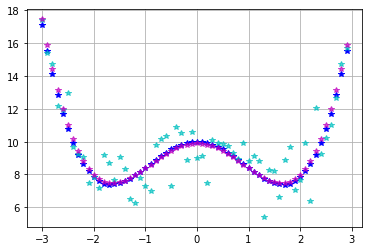

In [89]:
start, stop = -3, 3
step = 0.1
x = np.arange(start, stop, step) #zakres zmiennej x
values = 10*np.cos(x) + 3*x**2 #wartości , model idealny bylby 10 i 3

X = np.array([ #punkt pomiarowy modelu definiowany na x
    np.cos(x), x**2,]).T 

# y = a*e^(-bx) #takiej funnkcji nie damy rady fittowac

values_with_noise = values + np.random.normal(0, 1, size=values.shape) #wartości z szumem

def least_squares(X, y): #zdefiniowanie funkcji do metody najmnijeszych kwadratów
    return np.linalg.inv(X.T @ X) @ X.T @ y 

model = least_squares(X, values_with_noise) #obliczenie modelu
print(model)

fitted = X @ model #wartosci dopasowane

plt.figure() #przedstawienie wykresów
plt.plot(x, values, "b*") #wykres wartości
plt.plot(x, values_with_noise, "c*", alpha=0.7) #wykres wartości z szumem
plt.plot(x, fitted, "m*", alpha=0.7) #wykres dopasowanych wartości z szumem
plt.grid(True)

#metoda najmniejszych kwadratow mozna wykorzystac do dowolnego modelu, nie musi byc tylko wielomian
#mozemy fittowac tak długo jak nasze dwa parametry są w liniowej kombinacji

[0.1188719  0.02835788 1.07379403]


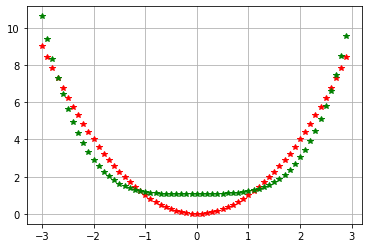

In [74]:
#wpływ doboru modelu na wynik
start, stop = -3, 3
step = 0.1
x = np.arange(start, stop, step) #wygenerowanie zakresu zmiennej x
values = x**2 #wartości
 
X = np.array([ #nasz model, dla wielomianu 4 stopnia
    x**4, x**1, x**0]).T

model = least_squares(X, values) #obliczenie wartości modelu
print(model) 
fitted = X @ model #obliczenie dopasowanych wartości

plt.figure() #przedstawienie wykresów
plt.plot(x, values, "r*") #wykres wartości 
plt.plot(x, fitted, "g*") #wykres dopasowanych wartości
plt.grid(True)

#sukces metody najmnijeszych kwadratów zalezy od tego czy dobrze dobierzemy model

In [98]:
#bardziej inteligentne rozwiazywanie układów równań
"""
2*x + 3*y + 5*z = 10
0*x + 2*y + 3*z = 7
0*x + 0*y + 2*z = 4
"""

A = np.array([ #zdefiniowanie macierzy A
    [2, 3, 5],
    [0, 2, 3],
    [0, 0, 2],], dtype=np.float32) 
 
y = np.array([10, 7, 4]) #zdefiniowanie wektora y

def solve_upper_triangular(A, y): #zdefiniowanie funkcji do obliczania macierzy gornej trojkatnej
    x = np.zeros(y.shape)
    for i in range(len(y) - 1, -1, -1): #pętla do rozwiazywania kolejnych równań 
        if i == len(y) - 1: #dla ostatniego wiersza
            x[i] = y[i] / A[i, i] #algortym liczenia x dla ostatniego wiersza
        else: #dla pozostałych wierszy
            ratio = 1 / A[i, i] #dzielenie przez wyrażenie przy liczonym x
            x[i] = ratio * (y[i] - np.sum(A[i, i+1:] @ x[i+1:])) #algorytm liczenia x dla kolejnych wierszy
    return x #zwrócenie wektora rozwiazań

real_result = np.linalg.inv(A) @ y #obliczenie prawdziwego rozwiazania układu równań
our_result = solve_upper_triangular(A, y) #obliczenie naszego rozwiązania układu równań
print("Real result: ", real_result)
print("Our result: ", our_result)
print(A @ real_result) #sprawdzenie prawdziwego rozwiazania

A = np.array([ #zdefiniowanie macierzy A
    [2, 3, 5, 2],
    [0, 2, 3, 3],
    [0, 0, 2, 7],
    [0, 0, 0, 3]], dtype=np.float32)

y = np.array([10, 7, 4, 3]) #zdefiniowanie wektora y

real_result = np.linalg.inv(A) @ y #obliczenie prawdziwego rozwiazania układu równań
our_result = solve_upper_triangular(A, y) #obliczenie naszego rozwiązania układu równań
print("Real result: ", real_result)
print("Our result: ", our_result)
print(A @ real_result) #sprawdzenie prawdziwego rozwiazania



#testy do sprawdzenia działania naszej funkcji

import random
max_size = 40 #maksymalny rozmiar macierzy
num_iters = 100 #liczba iteracji
no_positive = 0 #liczba pozytywnych testów

for i in range(num_iters): #pętla do przeprowadzenia testów
    size = random.randint(1, max_size) #wygenerowanie losowego rozmiaru macierzy
    A = np.random.randn(size, size) #wygenerowanie losowej macierzy A
    y = np.random.randn(size) #wygenerowanie losowego wektora y
    copy_A = A.copy() #skopiowanie macierzy A
    indices = np.tril_indices(A.shape[0]) #wyznaczenie indeksów poniżej przekątnej macierzy A
    A[indices] = 0.0 #wyzerowanie elementów macierzy o indeksach poniżej przekątnej
    np.fill_diagonal(A, copy_A[np.diag_indices(A.shape[0])]) #wypełnienie macierzy A zerami

    x_1 = solve_upper_triangular(A, y) #obliczenie rozwiazania nasza funkcja
    x_2 = np.linalg.inv(A) @ y # obliczenie rozwiazania gotowa funkcja
    if np.allclose(x_1, x_2): #dla x_1 i x_2 równych
        no_positive += 1 #zwiekszenie liczby sukcesów
        
        
print("Positive: ", no_positive)



Real result:  [-0.75  0.5   2.  ]
Our result:  [-0.75  0.5   2.  ]
[10.  7.  4.]
Real result:  [ 1.375  4.25  -1.5    1.   ]
Our result:  [ 1.375  4.25  -1.5    1.   ]
[10.  7.  4.  3.]
Positive:  100


In [102]:
#ZADANIE 2
#Korzystając z funkcji zaimplementowanej w Zadaniu 1 - zaimplementuj funkcję do rozwiązywania układów równań
#(zakładając, że układ równań posiada jedno rozwiązanie). Skorzystaj z funkcji "solve upper triangular" 
#zaimplementowanej na zajęciach.

def solve_equations(A, y): #zdefiniowanie funkcji do obliczenia układu równań
    
    X , z = gaussian_elimination_2(A, y) #wyznaczenie nowej macierzy górnej trójkątnej i zmienionego wektora y
    
    #print("Upper traiangular A \n",X)
    #print("B: \n", z)
    
    rozw = solve_upper_triangular(X, z) #obliczenie rozwiazania nowej macierzy i wektora
    
    return rozw #zwrócenie rozwiązania
    
#Przykładowe macierze i wektory
    
O = np.array([
    [1, 3, 5],
    [2, 5, 4],
    [2, 5, 2],], dtype=np.float32)

x = np.array([15, 17, 13])

A = np.array([
    [2, 5, 3],
    [8, -3, 5],
    [5, -2, 3],], dtype=np.float32)

y = np.array([
    12, -9, 15], dtype=np.float32)
    
print("Nasze rozwiązanie układu \n", solve_equations(O, x))
print("Prawdziwe rozwiązanie układu \n", np.linalg.inv(O) @ x)

#testy do sprawdzenia działania naszej funkcji

import random
max_size = 40 #maksymalny rozmiar macierzy
num_iters = 100 #liczba iteracji
no_positive = 0 #liczba pozytywnych testów

for i in range(num_iters): #pętla do przeprowadzenia testów
    size = random.randint(1, max_size) #wygenerowanie losowego rozmiaru macierzy
    A = np.random.randn(size, size) #wygenerowanie losowej macierzy A
    y = np.random.randn(size) #wygenerowanie losowego wektora y
    x_1 = solve_equations(A, y) #obliczenie rozwiazania nasza funkcja
    x_2 = np.linalg.inv(A) @ y # obliczenie rozwiazania gotowa funkcja
    if np.allclose(x_1, x_2): #dla x_1 i x_2 równych
        no_positive += 1 #zwiekszenie liczby sukcesów
        
print("Positive: ", no_positive)

Nasze rozwiązanie układu 
 [2. 1. 2.]
Prawdziwe rozwiązanie układu 
 [2. 1. 2.]
Positive:  100


In [91]:
# LU
A = np.array([ #zdefiniowanie macierzy A
    [2, 5, 3, 1],
    [8, -3, 5, 2],
    [5, -2, 3, 3],
    [5, -2, 3, 4]], dtype=np.float32)


p, L, U = scipy.linalg.lu(A)  #zdekomponowanie macierzy A
print("P: ")
print(p)
print("L: ")
print(L )
print("U: ")
print(U)

# A = pLU

print( p @ L @ U)

"""
1) Ax = y 
2) LUx = y
3) Lz = y
4) Ux = z
"""
#Duzym plusem jest mozliwosc wykonania dekompozycji bez znajomosci wektora y

P: 
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
L: 
[[ 1.          0.          0.          0.        ]
 [ 0.25        1.          0.          0.        ]
 [ 0.625      -0.02173913  1.          0.        ]
 [ 0.625      -0.02173913  1.          1.        ]]
U: 
[[ 8.         -3.          5.          2.        ]
 [ 0.          5.75        1.75        0.5       ]
 [ 0.          0.         -0.08695652  1.7608696 ]
 [ 0.          0.          0.          0.9999999 ]]
[[ 2.         5.         3.         1.       ]
 [ 8.        -3.         5.         2.       ]
 [ 5.        -2.         3.         3.       ]
 [ 5.        -2.         3.         3.9999998]]


'\n1) Ax = y \n2) LUx = y\n3) Lz = y\n4) Ux = z\n'

In [107]:
# A = U @ S @ Vt -> 
#U - macierz wektorow osobliwych "lewa", 
#S - wartości osobliwe (macierz diagnalna), 
#Vt - macierz wektorow osobliwych "prawa"

# U.T @ U = I
# Vt.T @ Vt = I
# S -> wyznaczenie rzędu macierzy

#SVD - rozkład według wartości osobliwych

np.set_printoptions(precision=5)

A = np.array([ #zdefiniowanie macierzy A
    [8, 2, 1, 4, 2],
    [5, 2, 1, 0, 7],
    [2, 1, 8, 4, 0],
    [-2, 5, 4, 1, 0],
    [8, 2, 3, 0, -1]], dtype=np.float32)

# A = np.array([
#     [8, 2, 1, 4, 2],
#     [5, 2, 1, 0, 7],
#     [2, 1, 8, 4, 0],
#     [-2, 5, 4, 1, 0],
#     [-2, 5, 4, 1, 0]], dtype=np.float32)

U, S, Vt = np.linalg.svd(A) #rozkład według wartości osobliwych
print("U:\n", U, "\n")
print("S:\n", S, "\n")
print("Vt:\n", Vt, "\n")
Sigma = np.eye(S.shape[0])*S 
print(Sigma, "\n")

print("U @ Sigma @ Vt: \n",U @ Sigma @ Vt, "\n")
print("U @ U.T:\n",U @ U.T, "\n")
print("Vt.T @ Vt:\n", Vt.T @ Vt, "\n")

#SVD można policzyc dla doslownie kazdej macierzy jaka istnieje

U:
 [[-0.58519  0.24682 -0.15763 -0.13457  0.74409]
 [-0.43907  0.38158  0.74163 -0.068   -0.32707]
 [-0.4249  -0.67283 -0.0555  -0.55991 -0.224  ]
 [-0.12132 -0.57758  0.41379  0.62625  0.29709]
 [-0.51914  0.08472 -0.50083  0.52113 -0.44823]] 

S:
 [15.01297  9.20457  6.33895  4.12895  3.10742] 

Vt:
 [[-0.77514 -0.27432 -0.43071 -0.27721 -0.2481 ]
 [ 0.47473 -0.2319  -0.73989 -0.24788  0.33461]
 [-0.39409  0.34387  0.04617 -0.06921  0.84824]
 [ 0.09208  0.77707 -0.14858 -0.52112 -0.30667]
 [-0.09998  0.38586 -0.49279  0.76509 -0.11363]] 

[[15.01297  0.       0.       0.       0.     ]
 [ 0.       9.20457  0.       0.       0.     ]
 [ 0.       0.       6.33895  0.       0.     ]
 [ 0.       0.       0.       4.12895  0.     ]
 [ 0.       0.       0.       0.       3.10742]] 

U @ Sigma @ Vt: 
 [[ 8.00000e+00  2.00000e+00  1.00000e+00  4.00000e+00  2.00000e+00]
 [ 5.00000e+00  2.00000e+00  1.00000e+00 -1.27974e-07  7.00000e+00]
 [ 2.00000e+00  1.00000e+00  8.00000e+00  4.00000e+00 -

In [108]:
# Ax = y
# U S Vt x = y
# U.T U S Vt x = Ut y
# S Vt x = U.T y
# Vt x = 1/S U.T y
# x = Vt.T 1/S U.T y

A = np.array([ #zdefiniowanie macierzy A
    [2, 5, 3],
    [8, -3, 5],
    [5, -2, 3],], dtype=np.float32)

y = np.array([ #zdefiniowanie wektora y
    12, -9, 15], dtype=np.float32)

U, S, Vt = np.linalg.svd(A) #rozkład według wartości osobliwych
Sigma = np.eye(S.shape[0])*S #wygenerowanie macierzy sigma
SigmaInv = np.eye(S.shape[0])*(1/S) #wyegenrowanie odwroconej macierzy sigma

x = np.linalg.inv(A) @ y #obliczenie rozwiazan przez inwersje
print(x)

x = Vt.T @ SigmaInv @ U.T @ y #obliczenie rozwiazan z rozkladu svd
print(x)

#

[ 177.75   75.75 -240.75]
[ 177.75001   75.75    -240.75002]


In [6]:
# ZADANIE 3
#Bazując na funkcji "solve upper triangular" zaimplementuj funkcję "solve lower triangular", a następnie wykorzystaj 
#ją do rozwiązania przykładowych układów równań korzystając z dekompozycji LU. Jakie są zalety i dodatkowe możliwości 
#rozwiazywania układów równań korzystajac z dekompozycji LU względem np. eliminacji Gaussa, bezpośredniego odwracania 
#macierzy, metody pseudoinwersji?

def solve_lower_triangular(A, y): #zdefiniowanie funkcji do obliczania macierzy dolnej trojkatnej
    x = np.zeros(y.shape)
    for i in range(0, len(y), 1): #pętla do rozwiazywania kolejnych równań 
        if i == 0: #dla pierwszego wiersza
            x[i] = y[i] / A[i,i] #algortym liczenia x dla pierwszego wiersza
        else: #dla pozostałych wierszy
            ratio = 1 / A[i,i] #dzielenie przez wyrażenie przy liczonym x
            x[i] = ratio * (y[i] - np.sum(A[i, 0:] @ x[0:])) #algorytm liczenia x dla kolejnych wierszy
    return x #zwrócenie wektora rozwiazań

def solve_upper_triangular(A, y): #zdefiniowanie funkcji do obliczania macierzy gornej trojkatnej
    x = np.zeros(y.shape)
    for i in range(len(y) - 1, -1, -1): #pętla do rozwiazywania kolejnych równań 
        if i == len(y) - 1: #dla ostatniego wiersza
            x[i] = y[i] / A[i, i] #algortym liczenia x dla ostatniego wiersza
        else: #dla pozostałych wierszy
            ratio = 1 / A[i, i] #dzielenie przez wyrażenie przy liczonym x
            x[i] = ratio * (y[i] - np.sum(A[i, i+1:] @ x[i+1:])) #algorytm liczenia x dla kolejnych wierszy
    return x #zwrócenie wektora rozwiazań


A1 = np.array([
    [2, 5, 3, 1],
    [8, -3, 5, 2],
    [5, 6, 3, 3],
    [5, -2, 3, 4]], dtype=np.float32)

y1 = np.array([10, 7, 8, 5], dtype = np.float32)

A2 = np.array([
    [2, 5, 3],
    [8, -3, 5],
    [5, -2, 3],], dtype=np.float32)

y2 = np.array(
    [10, 7, 8], dtype=np.float32)


p, L, U = scipy.linalg.lu(A1) #dekompozycja macierzy A2

print("p: \n", p)

#Pierwszy i drugi wiersz zamienione, więc y też zamieniamy

D = solve_lower_triangular(L ,(y1 @ p)) #obliczenie macierzy D
X = solve_upper_triangular(U,D) #obliczenie rozwiazania układu równań

print("True solution: \n" , np.linalg.solve(A1, y1))
print("Our solution: \n",  X )
print("y: \n", y1)
print("Our y \n", A1 @ X)



p: 
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
True solution: 
 [-1.0696203   0.42405063  3.2088609   0.39240506]
Our solution: 
 [-1.06962025  0.42405062  3.20886073  0.3924051 ]
y: 
 [10.  7.  8.  5.]
Our y 
 [9.99999992 7.         8.         5.0000001 ]
